In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df = pd.read_excel('data.xlsx')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Customer Service Calls,Net Promoter Score (NPS),Employment Status,Housing Status,Customer Satisfaction Surveys
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,4,9,Full-time,0,6
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,43,Full-time,1,9
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,-83,Full-time,0,6
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2,45,Full-time,1,5
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3,36,Full-time,1,8


In [25]:
#drop unnecessary columns
df = df.drop(["country", "customer_id"], axis=1)
df.dtypes

credit_score                       int64
gender                            object
age                                int64
tenure                             int64
balance                          float64
products_number                    int64
credit_card                        int64
active_member                      int64
estimated_salary                 float64
churn                              int64
Customer Service Calls             int64
Net Promoter Score (NPS)           int64
Employment Status                 object
Housing Status                     int64
Customer Satisfaction Surveys      int64
dtype: object

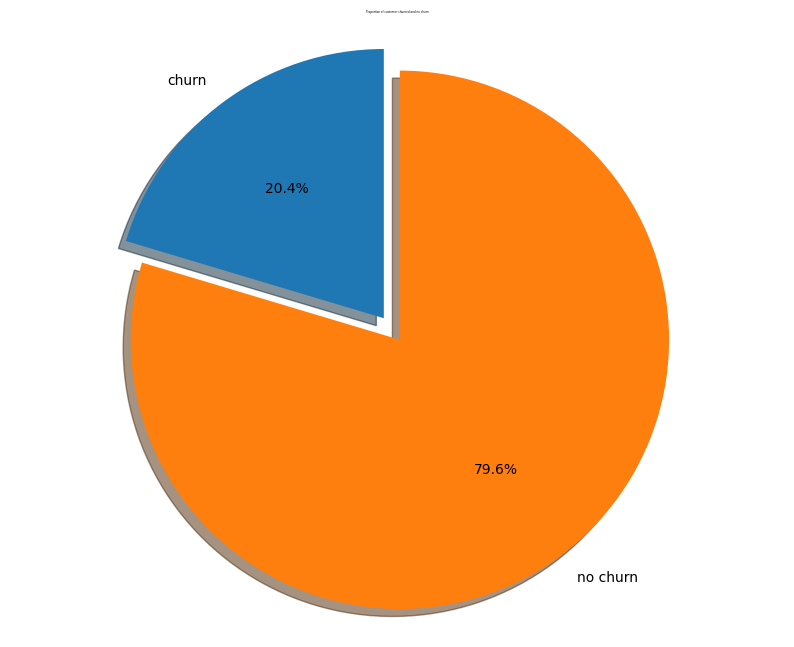

In [26]:
#exploratory data analysis
labels = 'churn', 'no churn'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and no churn", size = 2)
plt.show()

<Axes: xlabel='Housing Status', ylabel='count'>

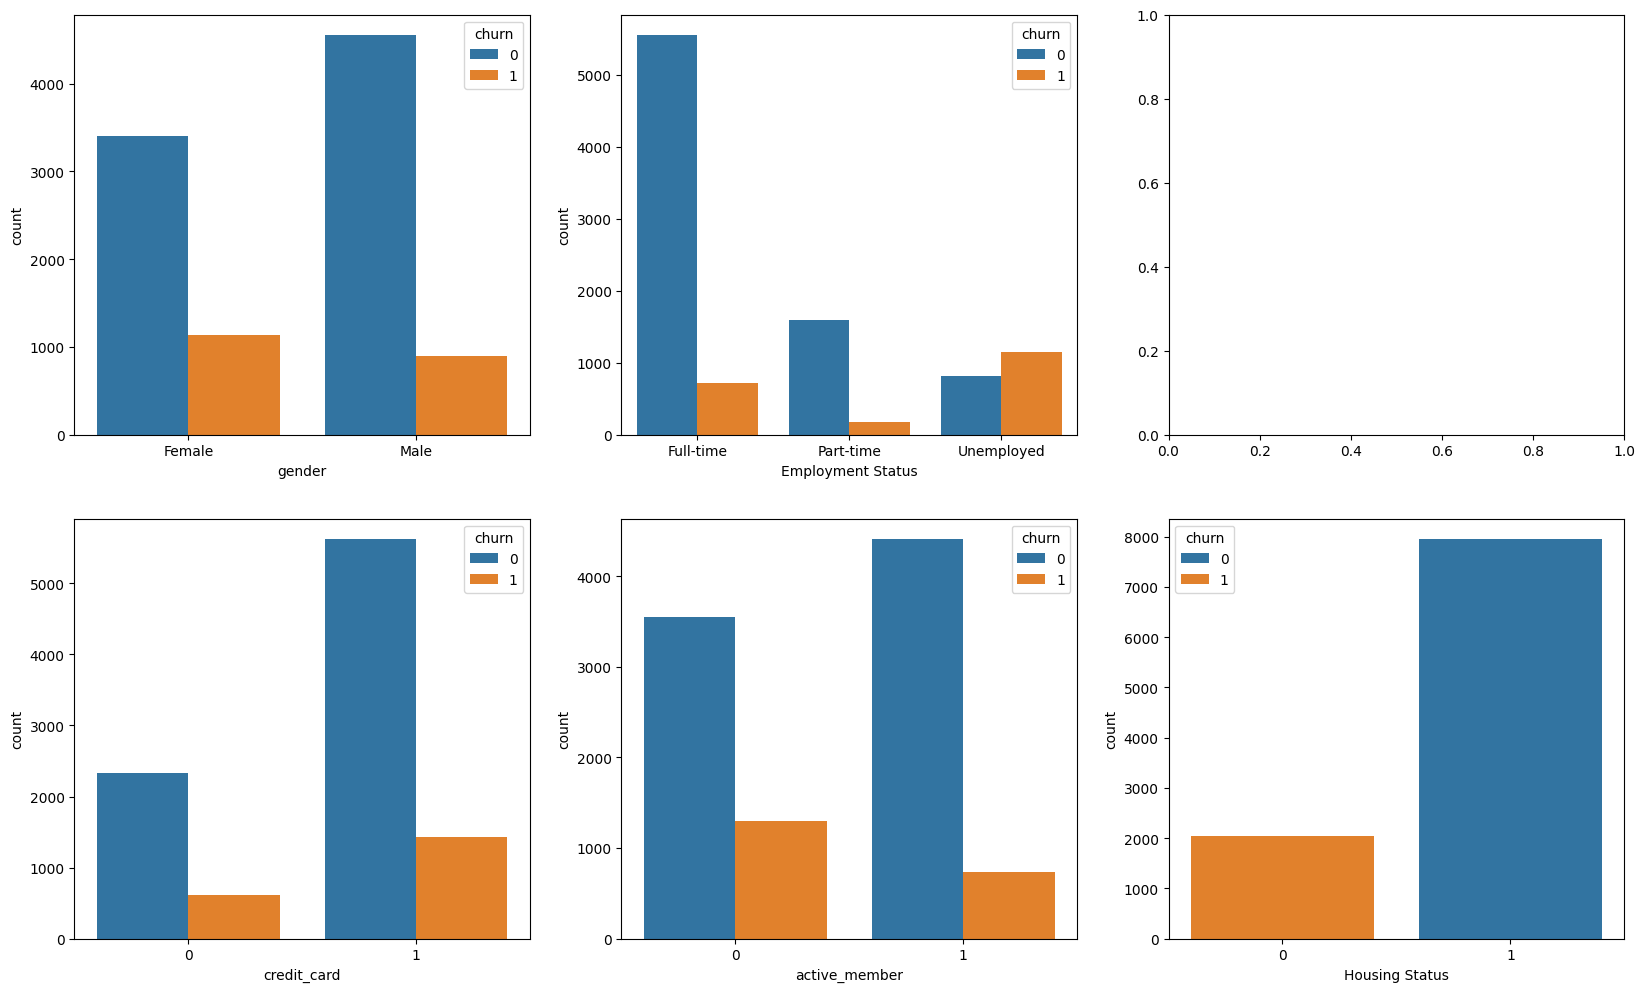

In [27]:
#eda - looking at categorical features
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))
sns.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0][0])
sns.countplot(x='Employment Status', hue = 'churn',data = df, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = df, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn',data = df, ax=axarr[1][1])
sns.countplot(x='Housing Status', hue = 'churn',data = df, ax=axarr[1][2])

<Axes: xlabel='churn', ylabel='Customer Satisfaction Surveys'>

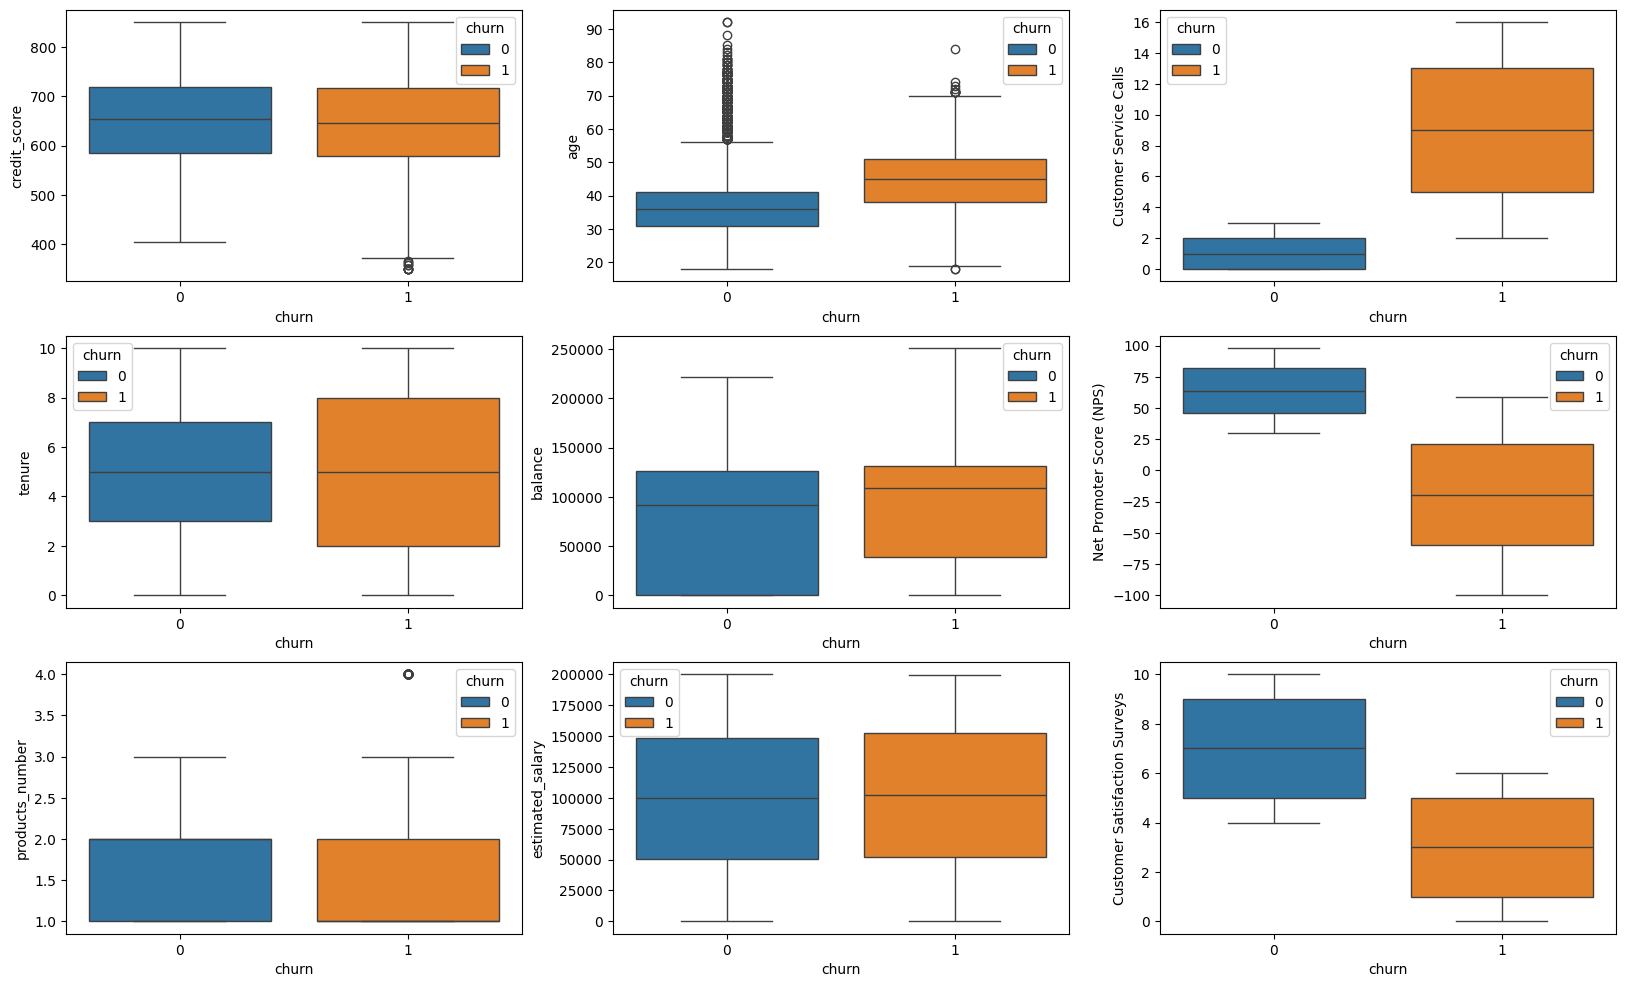

In [28]:
#eda - looking at continuous features
fig, axarr = plt.subplots(3, 3, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = df, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = df, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = df, ax=axarr[2][1])
sns.boxplot(y='Customer Service Calls',x = 'churn', hue = 'churn',data = df, ax=axarr[0][2])
sns.boxplot(y='Net Promoter Score (NPS)',x = 'churn', hue = 'churn',data = df, ax=axarr[1][2])
sns.boxplot(y='Customer Satisfaction Surveys',x = 'churn', hue = 'churn',data = df, ax=axarr[2][2])

In [29]:
#changing 1 and 0 to 1 and -1
df.loc[df.credit_card == 0, 'credit_card'] = -1
df.loc[df.active_member == 0, 'active_member'] = -1
df.loc[df['Housing Status'] == 0, 'Housing Status'] = -1
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Customer Service Calls,Net Promoter Score (NPS),Employment Status,Housing Status,Customer Satisfaction Surveys
0,619,Female,42,2,0.00,1,1,1,101348.88,1,4,9,Full-time,-1,6
1,608,Female,41,1,83807.86,1,-1,1,112542.58,0,3,43,Full-time,1,9
2,502,Female,42,8,159660.80,3,1,-1,113931.57,1,3,-83,Full-time,-1,6
3,699,Female,39,1,0.00,2,-1,-1,93826.63,0,2,45,Full-time,1,5
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,3,36,Full-time,1,8


In [30]:
#one hot encoding of categorical features
if df['gender'].dtype == object:
    for gender_value in df['gender'].unique():
        df['gender_' + gender_value] = np.where(df['gender'] == gender_value, 1, -1)

df = df.drop('gender', axis=1)

if df['Employment Status'].dtype == object:
    for employment_value in df['Employment Status'].unique():
        df['Employment_' + employment_value.replace(' ', '_')] = np.where(df['Employment Status'] == employment_value, 1, -1)

df = df.drop('Employment Status', axis=1)

df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Customer Service Calls,Net Promoter Score (NPS),Housing Status,Customer Satisfaction Surveys,gender_Female,gender_Male,Employment_Full-time,Employment_Part-time,Employment_Unemployed
0,619,42,2,0.00,1,1,1,101348.88,1,4,9,-1,6,1,-1,1,-1,-1
1,608,41,1,83807.86,1,-1,1,112542.58,0,3,43,1,9,1,-1,1,-1,-1
2,502,42,8,159660.80,3,1,-1,113931.57,1,3,-83,-1,6,1,-1,1,-1,-1
3,699,39,1,0.00,2,-1,-1,93826.63,0,2,45,1,5,1,-1,1,-1,-1
4,850,43,2,125510.82,1,1,1,79084.10,0,3,36,1,8,1,-1,1,-1,-1


In [31]:
#splitting into training and testing
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)  # Features (all columns except 'Churn')
y = df['churn']                # Target variable ('Churn' column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg_model = LogisticRegression(max_iter = 1000)
logreg_model.fit(X_train, y_train)

logreg_y_pred = logreg_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print(f"Accuracy: {logreg_accuracy}")

Accuracy: 0.9945


In [33]:
#random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Accuracy: {rf_accuracy}')


Accuracy: 1.0


In [34]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Accuracy: {dt_accuracy}')


Accuracy: 1.0
